In [1]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [5]:
df['gender'].replace({'male':1,'female':0},inplace=True)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group A,high school,standard,completed,67,67,63
1,0,group D,some high school,free/reduced,none,40,59,55
2,1,group E,some college,free/reduced,none,59,60,50
3,1,group B,high school,standard,none,77,78,68
4,1,group E,associate's degree,standard,completed,78,73,68


In [7]:
print('total number gender in exam',+len(df.index))

total number gender in exam 1000


<AxesSubplot:xlabel='gender', ylabel='count'>

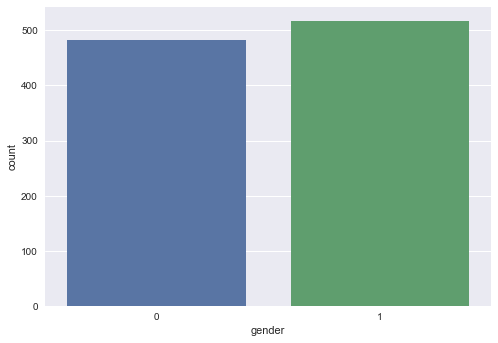

In [8]:
#viz
sns.countplot(x=df['gender'])

<AxesSubplot:xlabel='gender', ylabel='count'>

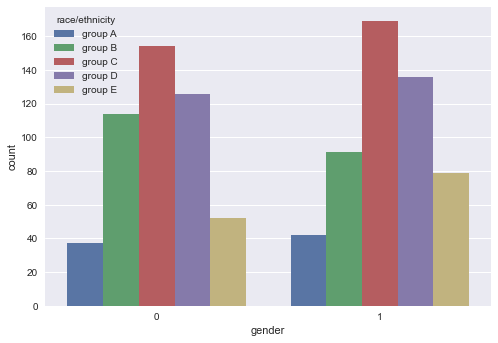

In [9]:
sns.countplot(x=df['gender'],hue=df['race/ethnicity'].sort_values())

<AxesSubplot:xlabel='lunch', ylabel='count'>

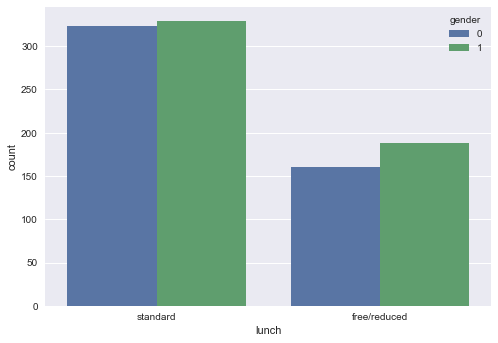

In [10]:
sns.countplot(x=df['lunch'],hue=df['gender'])

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

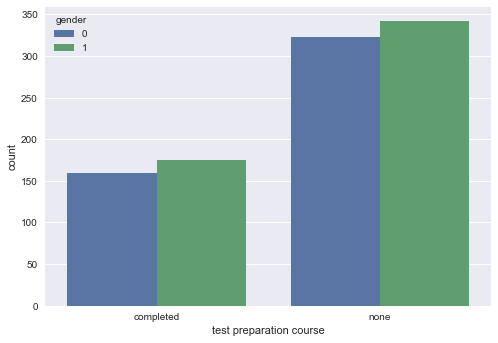

In [11]:
sns.countplot(x=df['test preparation course'],hue=df['gender'])

<AxesSubplot:xlabel='math score', ylabel='count'>

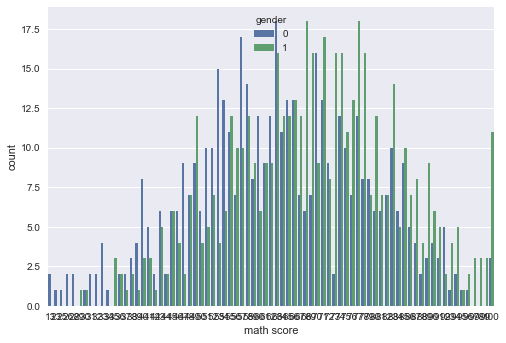

In [12]:
sns.countplot(x=df['math score'],hue=df['gender'])

<AxesSubplot:xlabel='reading score', ylabel='count'>

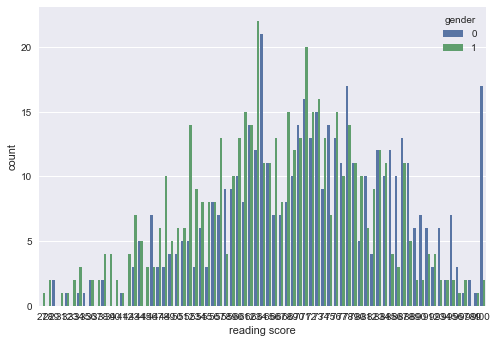

In [13]:
sns.countplot(x=df['reading score'],hue=df['gender'])

<AxesSubplot:xlabel='writing score', ylabel='count'>

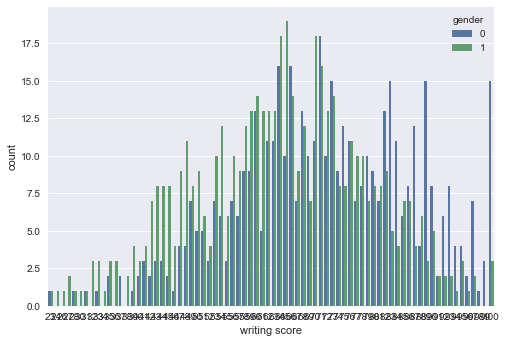

In [14]:
sns.countplot(x=df['writing score'],hue=df['gender'])

<AxesSubplot:ylabel='Frequency'>

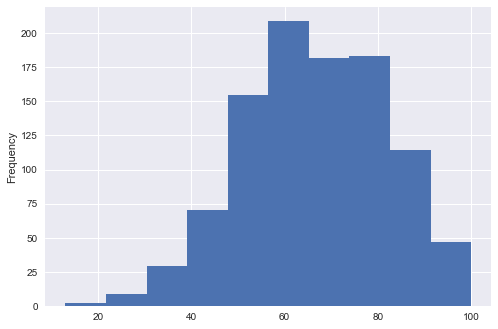

In [15]:
df['math score'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

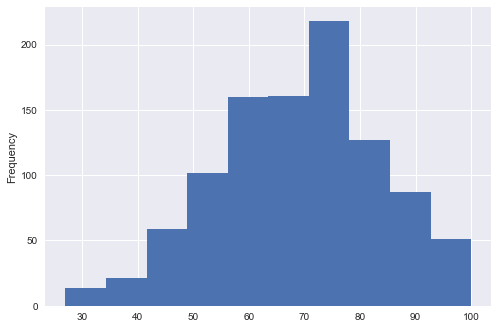

In [16]:
df['reading score'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

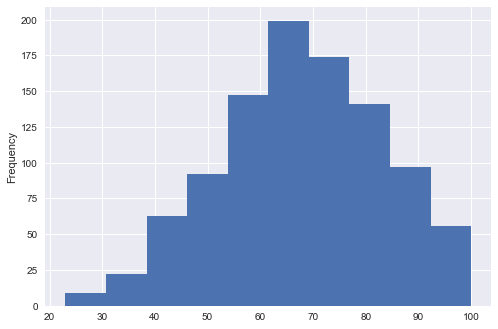

In [17]:
df['writing score'].plot.hist()

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

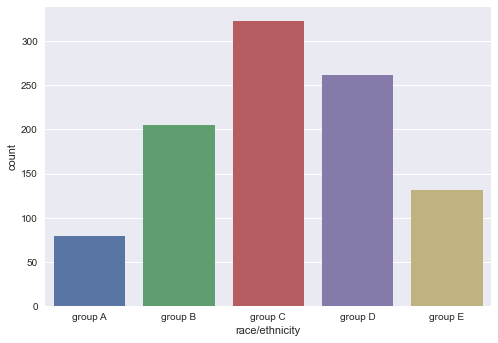

In [18]:
sns.countplot(x=df['race/ethnicity'].sort_values())

#### data wrangling

<AxesSubplot:>

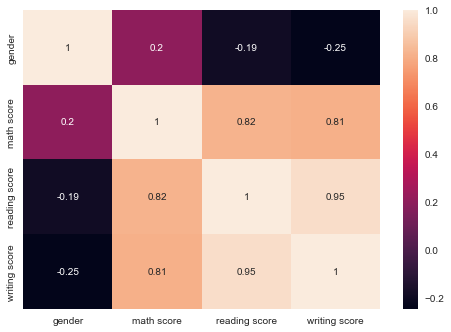

In [19]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

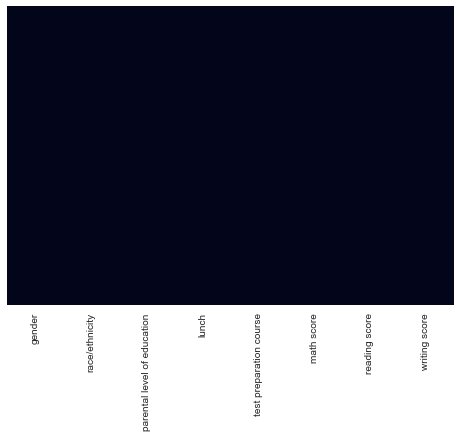

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
#if it would have some null value so it show some color otherwise it is completly black

In [21]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [22]:
race = pd.get_dummies(df['race/ethnicity'])
race.head()

,group A,group B,group C,group D,group E
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,0,1


In [23]:
df['lunch'].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [24]:
lunch = pd.get_dummies(df['lunch'],drop_first='first')
lunch.head(5)

,standard
0,1
1,0
2,0
3,1
4,1


In [25]:
df['test preparation course'].value_counts()

none         665
completed    335
Name: test preparation course, dtype: int64

In [26]:
tpc = pd.get_dummies(df['test preparation course'],drop_first='first')
tpc.head()

,none
0,0
1,1
2,1
3,1
4,0


In [27]:
df['parental level of education'].value_counts()
pled = pd.get_dummies(df['parental level of education'])
pled.head()

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [28]:
df = pd.concat([df,lunch,tpc,race,pled],axis=1)

In [29]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,standard,none,...,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,group A,high school,standard,completed,67,67,63,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,group D,some high school,free/reduced,none,40,59,55,0,1,...,0,0,1,0,0,0,0,0,0,1
2,1,group E,some college,free/reduced,none,59,60,50,0,1,...,0,0,0,1,0,0,0,0,1,0
3,1,group B,high school,standard,none,77,78,68,1,1,...,1,0,0,0,0,0,1,0,0,0
4,1,group E,associate's degree,standard,completed,78,73,68,1,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,group C,high school,standard,none,73,70,65,1,1,...,0,1,0,0,0,0,1,0,0,0
996,1,group D,associate's degree,free/reduced,completed,85,91,92,0,0,...,0,0,1,0,1,0,0,0,0,0
997,0,group C,some high school,free/reduced,none,32,35,41,0,1,...,0,1,0,0,0,0,0,0,0,1
998,0,group C,some college,standard,none,73,74,82,1,1,...,0,1,0,0,0,0,0,0,1,0


In [30]:
df.drop(['lunch','test preparation course','race/ethnicity','parental level of education'],axis = 1 ,inplace=True)

In [31]:
df

,gender,math score,reading score,writing score,standard,none,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,67,67,63,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0,40,59,55,0,1,0,0,0,1,0,0,0,0,0,0,1
2,1,59,60,50,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,77,78,68,1,1,0,1,0,0,0,0,0,1,0,0,0
4,1,78,73,68,1,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,73,70,65,1,1,0,0,1,0,0,0,0,1,0,0,0
996,1,85,91,92,0,0,0,0,0,1,0,1,0,0,0,0,0
997,0,32,35,41,0,1,0,0,1,0,0,0,0,0,0,0,1
998,0,73,74,82,1,1,0,0,1,0,0,0,0,0,0,1,0


#### Train and test 

In [32]:
X = df.drop(['gender'],axis=1)
y = df['gender']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
#random_state it take same size of simple at every time

In [35]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = logR.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.91       145\n           1       0.90      0.93      0.91       155\n\n    accuracy                           0.91       300\n   macro avg       0.91      0.91      0.91       300\nweighted avg       0.91      0.91      0.91       300\n'

In [38]:
confusion_matrix(y_test,y_pred)

array([[129,  16],
       [ 11, 144]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)*100

91.0

# Summary:

In [40]:
#the number of male is greater than the female
#the column race/ethnicity overall the male have high figure in each group except Group B
#in lunch categoriCal col the standard have significant amount than free/reduced however male ratio still higher in both
#overall in math score the female got high position 
#overall in writing and reading score the male got high position 
#i anaylsis that a few student who got math score 0 to 40, then we larg amount of student who got 40 to 80 mark, then we some student how got 90 to 100 score 
#i anaylsis that a few student who got reading score 0 to 40, then we larg amount of student who got 40 to 80 mark, then we some student how got 90 to 100 score
#i anaylsis that a few student who got writing score 0 to 40, then we larg amount of student who got 40 to 80 mark, then we some student how got 90 to 100 score
#heatmap shows correlation among the columns 
#heatmap shows there is no null values
#the get_dummy() convert information of the columns into discrete values 0,1, I do that to perform the logistic regression 
#here the accuracy shows that 91% male and female will pass the exam 